In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import cv2

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR = '/content/drive/MyDrive/MLDataset/WasteImagesDataset'

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1,
                                                                    subset="training", seed=42,
                                                                    batch_size=16, smart_resize=True)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1,
                                                                  subset="validation", seed=42,
                                                                  batch_size=16, smart_resize=True)

Found 5078 files belonging to 9 classes.
Using 4571 files for training.
Found 5078 files belonging to 9 classes.
Using 507 files for validation.


In [ ]:
classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes, numClasses)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper and Cardboard', 'Plastic', 'Textiles', 'Wood'] 9


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.inception_v3.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
 Inception_V3_Model = tf.keras.applications.InceptionV3(input_shape=(256, 256, 3),
                                             weights='imagenet',
                                             include_top=False,
                                             classes=numClasses)

for layer in Inception_V3_Model.layers[:249]:
    layer.trainable = False

for layer in Inception_V3_Model.layers[249:]:
    layer.trainable = True

In [ ]:
last_output = data_augmentation(Inception_V3_Model.output)
maxpooled_output = tf.keras.layers.Flatten()(last_output)

x = tf.keras.layers.Dense(1024, activation='relu')(maxpooled_output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(numClasses, activation='softmax')(x)

inception_model = tf.keras.Model(inputs=Inception_V3_Model.input, outputs=x)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

inception_model.compile(optimizer=optimizer,
                        loss=loss,
                        metrics=['accuracy'])

In [ ]:
train_history = inception_model.fit(train_dataset, validation_data = test_dataset, epochs=5)

Epoch 1/5
286/286 [==============================] - 329s 1s/step - loss: 1.7046 - accuracy: 0.3627 - val_loss: 1.5281 - val_accuracy: 0.4221
Epoch 2/5
286/286 [==============================] - 32s 109ms/step - loss: 1.4734 - accuracy: 0.4588 - val_loss: 1.5133 - val_accuracy: 0.4615
Epoch 3/5
286/286 [==============================] - 34s 116ms/step - loss: 1.2729 - accuracy: 0.5426 - val_loss: 1.5717 - val_accuracy: 0.4655
Epoch 4/5
286/286 [==============================] - 33s 114ms/step - loss: 1.0703 - accuracy: 0.6279 - val_loss: 1.8044 - val_accuracy: 0.4497
Epoch 5/5
286/286 [==============================] - 31s 107ms/step - loss: 0.8575 - accuracy: 0.7038 - val_loss: 1.6911 - val_accuracy: 0.4734


In [ ]:
inception_model.evaluate(test_dataset)

32/32 [==============================] - 3s 71ms/step - loss: 1.6911 - accuracy: 0.4734


[1.6911072731018066, 0.47337278723716736]

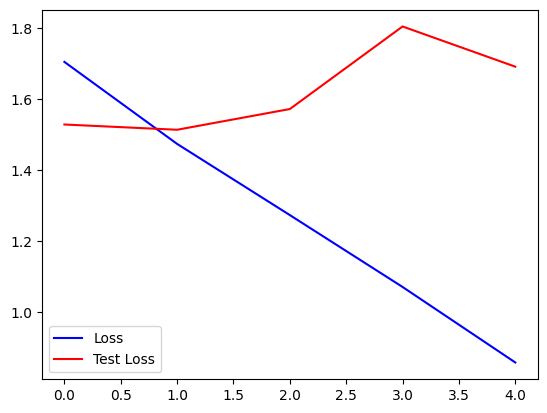

In [ ]:
epochs = 5
plt.plot(range(0, epochs), train_history.history["loss"], color="b", label="Loss")
plt.plot(range(0, epochs), train_history.history["val_loss"], color="r", label="Test Loss")
plt.legend()
plt.show()

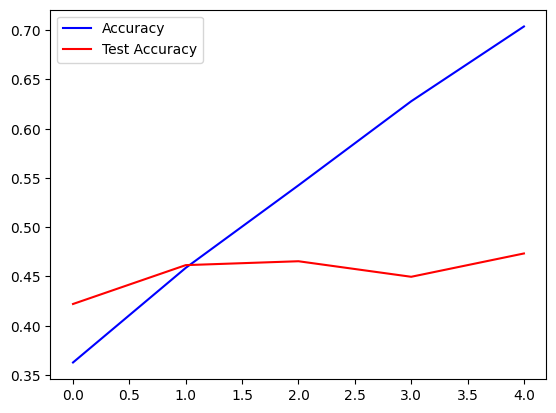

In [ ]:
plt.plot(range(0, epochs), train_history.history["accuracy"], color="b", label="Accuracy")
plt.plot(range(0, epochs), train_history.history["val_accuracy"], color="r", label="Test Accuracy")
plt.legend()
plt.show()

Text(0, 0.5, 'Loss')

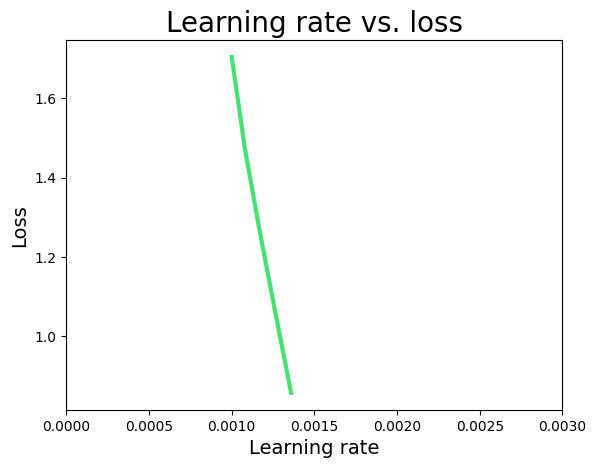

In [ ]:
plt.xlim([0, 0.003])
learning_rates = 1e-3 * (10 ** (np.arange(epochs) / 30))
plt.plot(learning_rates, train_history.history['loss'], lw=3, color='#48e073')
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14)

1/1 [==============================] - 3s 3s/step
[[1.6726974e-05 1.3988937e-07 5.9599479e-05 6.0867956e-07 3.6864819e-06
  9.9959439e-01 3.0154263e-04 1.2287864e-05 1.1017721e-05]]
Prediction: Paper and Cardboard
Prediction: 5
[1.6726974e-03 1.3988936e-05 5.9599481e-03 6.0867955e-05 3.6864818e-04
 9.9959442e+01 3.0154264e-02 1.2287864e-03 1.1017721e-03] 
 ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper and Cardboard', 'Plastic', 'Textiles', 'Wood']


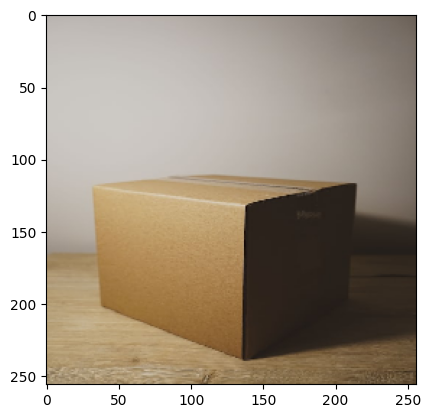

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

url = "https://images.unsplash.com/photo-1577705998148-6da4f3963bc8?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8Y2FyZGJvYXJkfGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60"
image = tf.keras.utils.get_file("Image1.jpg", origin=url)

img = load_img(image, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = inception_model.predict(img_array)
#score = tf.nn.softmax(predictions[0])

plt.imshow(img)
print(predictions)
print("Prediction: " + str(classes[np.argmax(predictions)]))
print("Prediction: " + str(np.argmax(predictions)))

print(predictions[0]*100, "\n", classes)
# print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")

In [ ]:
prediction = inception_model.predict(test_dataset)
print(len(prediction))
print(prediction[0])

32/32 [==============================] - 5s 92ms/step
507
[0.11125045 0.01664973 0.48394898 0.00853487 0.20257464 0.0899376
 0.06361477 0.01042263 0.01306626]


In [ ]:
print(prediction, "\n", classes)

for i in prediction:
  print("Prediction: ", classes[np.argmax(i)], np.argmax(i))


[[1.1125045e-01 1.6649732e-02 4.8394898e-01 ... 6.3614771e-02
  1.0422633e-02 1.3066260e-02]
 [1.0201748e-05 3.8736273e-10 9.9901044e-01 ... 9.4251597e-04
  1.6455459e-10 1.7142723e-10]
 [1.1191540e-03 7.1381282e-06 4.6167156e-04 ... 2.1479887e-05
  3.3832609e-04 6.0513761e-04]
 ...
 [7.8481771e-02 1.0313363e-01 3.7481699e-02 ... 1.3068175e-02
  2.9930273e-01 8.0312118e-02]
 [2.5451493e-01 1.8152408e-02 1.6310135e-02 ... 1.4503595e-03
  6.0712192e-03 3.6053362e-03]
 [7.4956518e-01 1.1687989e-01 1.1219399e-02 ... 2.1222371e-03
  5.2188588e-03 2.0468708e-03]] 
 ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper and Cardboard', 'Plastic', 'Textiles', 'Wood']
Prediction:  Glass 2
Prediction:  Glass 2
Prediction:  Paper and Cardboard 5
Prediction:  Paper and Cardboard 5
Prediction:  Carton 1
Prediction:  Plastic 6
Prediction:  Paper and Cardboard 5
Prediction:  Aluminium 0
Prediction:  Glass 2
Prediction:  Aluminium 0
Prediction:  Plastic 6
Prediction:  Aluminium 0
P

In [ ]:
def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy*100, misclass*100))
    plt.show()

plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [ ]:
true = []
predictions = []

path = DIR
for i in os.listdir(path):
  folderPath = os.path.join(path, i)
  for j in os.listdir(folderPath)[:550]:
    fullPath = os.path.join(folderPath, j)
    try:
      img = tf.keras.preprocessing.image.load_img(fullPath, target_size=(256, 256))
      img_array = tf.keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0)

      preds = inception_model.predict(img_array)
      true.append(classes.index(i))
      predictions.append(np.argmax(preds))
    except:
      print("Error on image:", fullPath)

1/1 [==============================] - 0s 26ms/step


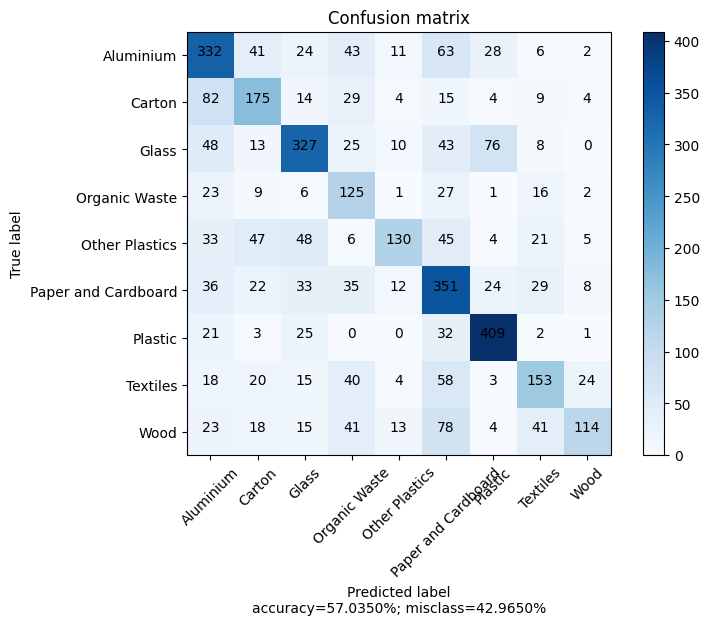

In [ ]:
plot_confusion_matrix(tf.math.confusion_matrix(true, predictions), classes)


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print('Classification Report : \n' + classification_report(true, predictions))

Classification Report : 
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       550
           1       0.50      0.52      0.51       336
           2       0.64      0.59      0.62       550
           3       0.36      0.60      0.45       210
           4       0.70      0.38      0.50       339
           5       0.49      0.64      0.56       550
           6       0.74      0.83      0.78       493
           7       0.54      0.46      0.49       335
           8       0.71      0.33      0.45       347

    accuracy                           0.57      3710
   macro avg       0.58      0.55      0.55      3710
weighted avg       0.59      0.57      0.57      3710

